In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np


In [2]:
model = models.Sequential()
model.add(layers.Dense(100,'relu', input_shape=(28*28*1,) ))
#model.add(layers.Conv2D(4,(2,2), input_shape=(28,28,1)))#default is data_format=channels_last
#model.add(layers.Flatten())
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(10,'softmax'))
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None


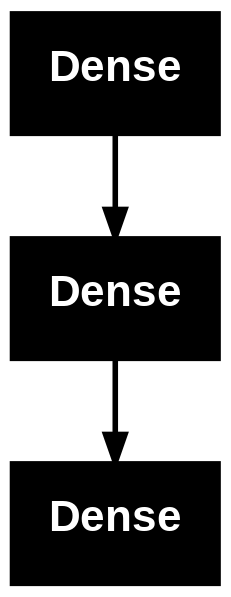

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [4]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
#(train_images, train_labels), (test_images, test_labels) = (np.expand_dims(train_images,-1), train_labels), (np.expand_dims(test_images,-1), test_labels)

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
#train_images.reshape(60000,28*28)

In [11]:
#test_images.shape

In [12]:
#test_images.reshape(10000,28*28)

In [13]:
import numpy as np
training_history=model.fit(train_images.reshape(60000,28*28), train_labels, validation_data=(test_images.reshape(10000,28*28), test_labels), epochs=20, batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.7884 - loss: 6.3335 - val_acc: 0.9222 - val_loss: 0.6443
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9241 - loss: 0.5565 - val_acc: 0.9306 - val_loss: 0.4493
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9420 - loss: 0.3419 - val_acc: 0.9372 - val_loss: 0.3853
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9543 - loss: 0.2559 - val_acc: 0.9502 - val_loss: 0.3525
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9598 - loss: 0.2039 - val_acc: 0.9452 - val_loss: 0.3571
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9643 - loss: 0.1827 - val_acc: 0.9570 - val_loss: 0.2442
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9697 - loss: 0.1487 - val_acc: 0.9641 - val_loss: 0.2125
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9729 - loss: 0.1263 - val_acc: 0.9649 - val_loss: 0.2337
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

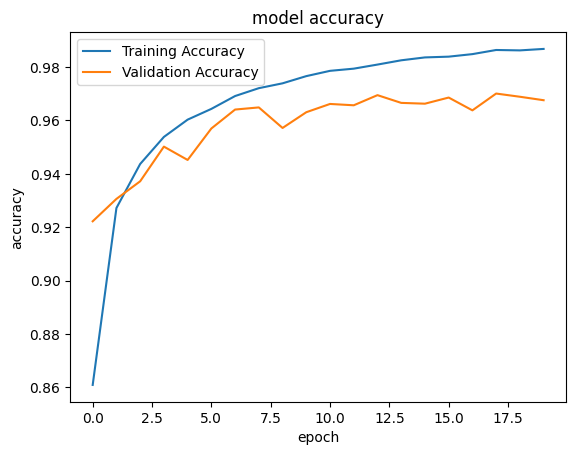

In [16]:
import matplotlib.pyplot as plt
epochs=range(0,20)
plt.plot(epochs,training_history.history['acc'],label='Training Accuracy')
plt.plot(epochs,training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


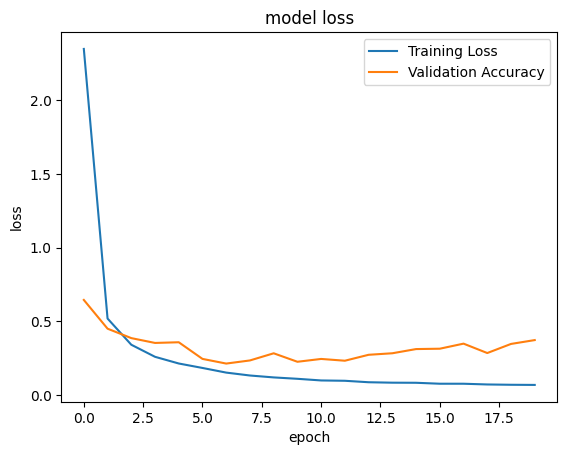

In [17]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


# Let's reshape into video data
Say we take every 10 frames of the 60K into one video stream:

In [21]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (6000,10,28*28)), np.reshape(train_labels, (6000,10))), (np.reshape(test_images, (1000,10,28*28)), np.reshape(test_labels, (1000,10)))

In [23]:
training_history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=75, batch_size=100)   #  reshape into video we need more epochs and more layers

Epoch 1/75


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=uint8)
  • training=True
  • mask=None

In [ ]:
plt.plot(training_history.history['acc'],label='Training Accuracy')
plt.plot(training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


In [ ]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


__So how can we feed the 5D video data?__

# TimeDistributed to the rescue!

What we actually seek is to apply the __same__ filter, across all the video frames (we don't need a separate parameters for every frame)


This wrapper applies a layer to every temporal slice of an input.

The input should be at least 3D, and the dimension of index one will be considered to be the temporal dimension.



In [24]:
model = models.Sequential()
model.add(layers.TimeDistributed(layers.Dense(100,'relu'), input_shape=(10,28*28)))
#model.add(layers.TimeDistributed(layers.Conv2D(4,(2,2)), input_shape=(10, 28,28,1)))
#model.add(layers.Flatten())
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(10,'softmax'))
#model.build(input_shape=(10,28*28,1))
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 10, 100)        │        78,500 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10, 100)        │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

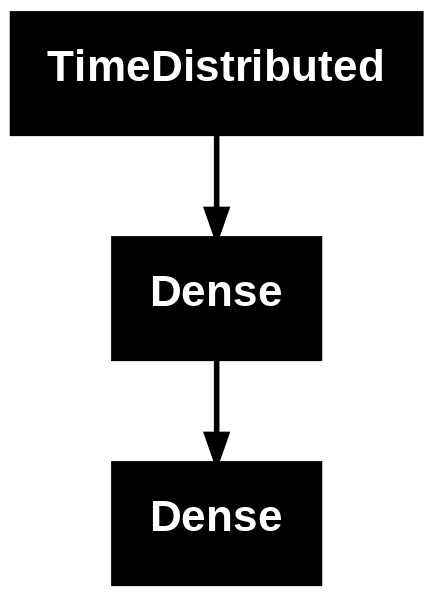

In [26]:
plot_model(model, to_file='model.png')

Notice how the number of parameters remain the same (20)!

Since we repeat the same filter across all the frames.

However, the output of flatten is x10, since we just concat all the frames outputs.

In [27]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [28]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (6000,10,28,28,1)), np.reshape(train_labels, (6000,10,1))), (np.reshape(test_images, (1000,10,28,28,1)), np.reshape(test_labels, (1000,10,1)))
train_images, test_images = np.reshape(train_images, (6000,10,28*28)), np.reshape(test_images, (1000,10,28*28))

In this case, we are __grouping/summarizing__ every 10 frames into one video, which can have __one__label.

So we need to take the last labels of every 10 as the video label:
But if we want to do this, we can'

In [29]:
#train_labels[::10].shape

In [30]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(6000, 10, 784)
(1000, 10, 784)
(60000,)
(10000,)


In [ ]:
#train_labels = train_labels[::10]
#test_labels = test_labels[::10]

In [31]:

training_history=model.fit(np.reshape(train_images,(6000,10,784)), np.reshape(train_labels,(6000,10,1)), validation_data=(np.reshape(test_images,(1000,10,784)), np.reshape(test_labels,(1000,10,1))), epochs=20, batch_size=100)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.6140 - loss: 21.1462 - val_acc: 0.8765 - val_loss: 1.9743
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.8785 - loss: 1.7108 - val_acc: 0.9104 - val_loss: 1.1357
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9214 - loss: 0.7879 - val_acc: 0.9258 - val_loss: 0.7044
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9395 - loss: 0.4814 - val_acc: 0.9293 - val_loss: 0.6749
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9503 - loss: 0.3458 - val_acc: 0.9370 - val_loss: 0.5444
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.9591 - loss: 0.2476 - val_acc: 0.9361 - val_loss: 0.5787
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9643 - loss: 0.2011 - val_acc: 0.9483 - val_loss: 0.4626
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9690 - loss: 0.1693 - val_acc: 0.9455 - val_loss: 0.4945
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.973

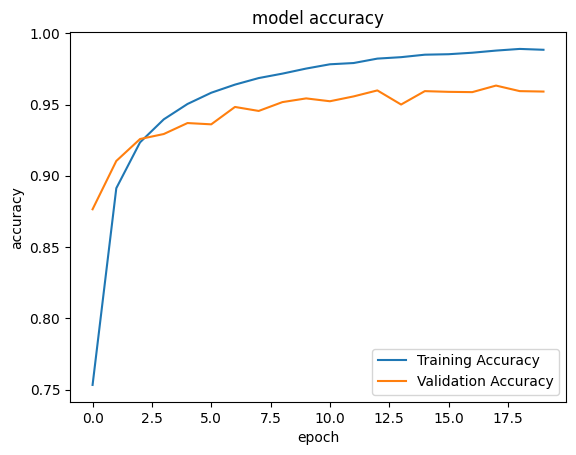

In [32]:
plt.plot(training_history.history['acc'],label='Training Accuracy')
plt.plot(training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


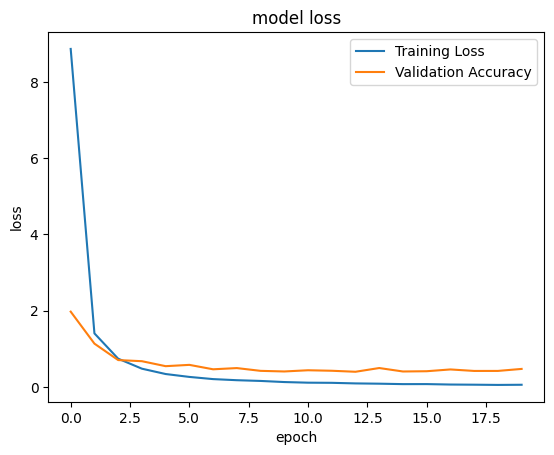

In [33]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


Of course the results are too bad! Since mnist is not video. We just used it to proof the concept.

# If we wanted to have classification per frame

In [34]:
frame_model = models.Sequential()
frame_model.add(layers.Dense(100, activation='relu', input_shape=(28*28,)))
#frame_model.add(layers.Conv2D(4,(2,2), input_shape=(28,28,1)))
#frame_model.add(layers.Flatten())
frame_model.add(layers.Dense(100, activation='relu'))
frame_model.add(layers.Dense(10, activation='softmax'))
print(frame_model.summary())



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In this case, we have the same output shape as before for every frame

In [35]:
model = models.Sequential()
model.add(layers.TimeDistributed(frame_model, input_shape=(10, 28*28,1)))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_1              │ (None, 10, 784, 10)    │        89,610 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

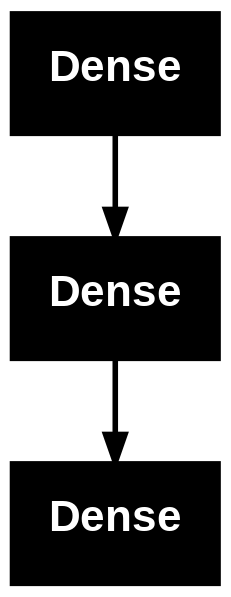

In [36]:
plot_model(frame_model, to_file='model.png')

The number of parameters remain the same, since we just repeat the same CNN



In [37]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (60000,28*28)), np.reshape(train_labels, (60000))), (np.reshape(test_images, (10000,28*28)), np.reshape(test_labels, (10000)))

In [38]:
train_images.shape

(60000, 784)

In [39]:
train_labels.shape

(60000,)

In [40]:
frame_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [41]:

training_history=frame_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.7709 - loss: 7.1293 - val_acc: 0.9205 - val_loss: 0.6990
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9282 - loss: 0.5551 - val_acc: 0.9330 - val_loss: 0.4846
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9469 - loss: 0.3115 - val_acc: 0.9286 - val_loss: 0.4114
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9592 - loss: 0.2158 - val_acc: 0.9530 - val_loss: 0.2652
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9631 - loss: 0.1734 - val_acc: 0.9543 - val_loss: 0.2478
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9686 - loss: 0.1432 - val_acc: 0.9526 - val_loss: 0.2652
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9729 - loss: 0.1205 - val_acc: 0.9493 - val_loss: 0.2737
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9738 - loss: 0.1126 - val_acc: 0.9592 - val_loss: 0.2255
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

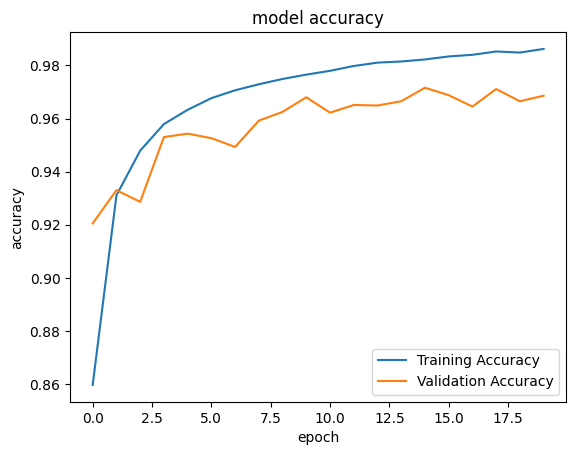

In [42]:
plt.plot(training_history.history['acc'],label='Training Accuracy')
plt.plot(training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


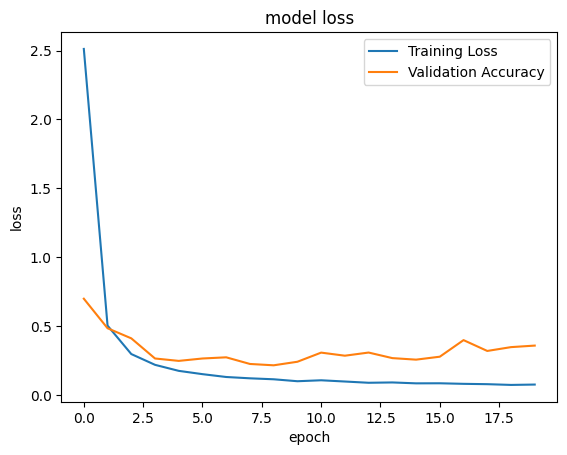

In [43]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
